In [2]:
import numpy as np
import keras as k
import itertools
import matplotlib.pyplot as plt 
%matplotlib inline

from keras import backend as b
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

from sklearn.metrics import confusion_matrix


<h1> Data Preprocessing </h1>

In [3]:
trainDataPath = 'cats-and-dogs/train'
testDataPath = 'cats-and-dogs/test'
validDataPath = 'cats-and-dogs/valid'

trainBatches= ImageDataGenerator().flow_from_directory(trainDataPath,
                                                       target_size = (224, 224),
                                                       classes = ['dog', 'cat'],
                                                       batch_size = 10)

validBatches = ImageDataGenerator().flow_from_directory(validDataPath,
                                                        target_size = (224, 224),
                                                        classes = ['dog', 'cat'], 
                                                        batch_size = 4)

testBatches = ImageDataGenerator().flow_from_directory(testDataPath,
                                                       target_size=(224,224),
                                                       classes = ['dog', 'cat'],
                                                       batch_size = 10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [12]:
#plots  images with labels within jupyter-notebook
def plots(ims, figsize=(12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray : 
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3) : 
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None : 
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [10]:
imgs, labels = next(trainBatches)

C:\Users\kuzub\miniconda3\envs\testEnv\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


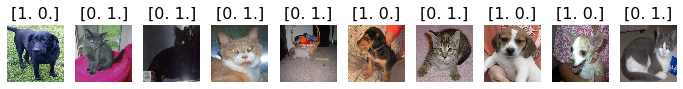

In [13]:
plots(imgs, titles = labels)
# that will give one_hot encoding

<h1> Build and Train CNN </h1>

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))



In [23]:
model.compile(Adam(lr=.0001),
              loss="categorical_crossentropy", 
              metrics = ["accuracy"])


In [24]:
model.fit_generator(trainBatches, steps_per_epoch=4, validation_data=validBatches, validation_steps=4, epochs=5,verbose = 2)

Epoch 1/5
4/4 - 0s - loss: 2318.8486 - accuracy: 0.4750 - val_loss: 1503.9314 - val_accuracy: 0.5000
Epoch 2/5
4/4 - 0s - loss: 2893.9043 - accuracy: 0.5000 - val_loss: 1455.0811 - val_accuracy: 0.5000
Epoch 3/5
4/4 - 0s - loss: 1397.0693 - accuracy: 0.5000 - val_loss: 2021.1641 - val_accuracy: 0.5000
Epoch 4/5
4/4 - 0s - loss: 931.1175 - accuracy: 0.6000 - val_loss: 1142.2030 - val_accuracy: 0.5000
Epoch 5/5
4/4 - 0s - loss: 1246.4182 - accuracy: 0.5000 - val_loss: 344.3588 - val_accuracy: 0.3750


<h1> Make Predictions </h1>

C:\Users\kuzub\miniconda3\envs\testEnv\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


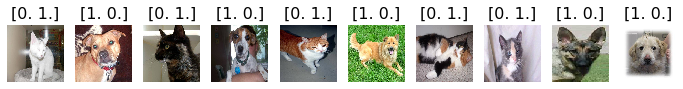

In [26]:
testImgs, testLabels = next(testBatches)
plots(testImgs, titles=testLabels)

In [27]:
testLabels = testLabels[:,0]
testLabels

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1.], dtype=float32)

In [28]:
predictions = model.predict_generator(testBatches, steps = 1, verbose = 0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [29]:
predictions

array([[1.000000e+00, 0.000000e+00],
       [9.646299e-31, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 9.940996e-26],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00]], dtype=float32)

*
*
*
*
(confusion matrix code will be added)